<a href="https://colab.research.google.com/github/jan-kreischer/FedRL-for-IT-Sec/blob/master/offline_prototype_1_raw_behaviors/train_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [18]:
# Insert the directory
import sys
sys.path.insert(0,'/content/drive/MyDrive/University/Master-Thesis/Code')

In [19]:
import os
original_working_directory = os.getcwd()
print("The original working directory is {0}".format(os.getcwd()))

def reset_working_directory():
    os.chdir(original_working_directory)
    print("Reset working directory to original {0}".format(original_working_directory))

The original working directory is /content


In [20]:
# Add the parent directory to the list of directories
# that the interpreter will search for dependencies 
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [21]:
 import os

from data_provider import DataProvider
from offline_prototype_1_raw_behaviors.environment import SensorEnvironment
from agent import Agent
from simulation_engine import SimulationEngine
from utils.evaluation_utils import plot_learning, seed_random, evaluate_agent, get_pretrained_agent, evaluate_agent_on_afterstates
from time import time
import numpy as np

In [27]:
os.chdir('/content/drive/MyDrive/University/Master-Thesis/Code')
os.getcwd()

'/content/drive/MyDrive/University/Master-Thesis/Code'

Streaming output truncated to the last 5000 lines.
episode  5021 | episode_return 1.00 | average episode_return 0.90 | epsilon 0.15
episode  5022 | episode_return 1.00 | average episode_return 0.90 | epsilon 0.15
episode  5023 | episode_return 1.00 | average episode_return 0.90 | epsilon 0.15
episode  5024 | episode_return 1.00 | average episode_return 0.90 | epsilon 0.15
episode  5025 | episode_return 1.00 | average episode_return 1.00 | epsilon 0.15
episode  5026 | episode_return 1.00 | average episode_return 1.00 | epsilon 0.15
episode  5027 | episode_return 0.00 | average episode_return 0.90 | epsilon 0.15
episode  5028 | episode_return 1.00 | average episode_return 0.90 | epsilon 0.15
episode  5029 | episode_return 1.00 | average episode_return 0.90 | epsilon 0.15
episode  5030 | episode_return 1.00 | average episode_return 0.90 | epsilon 0.15
episode  5031 | episode_return 1.00 | average episode_return 0.90 | epsilon 0.15
episode  5032 | episode_return 1.00 | average episode_retu

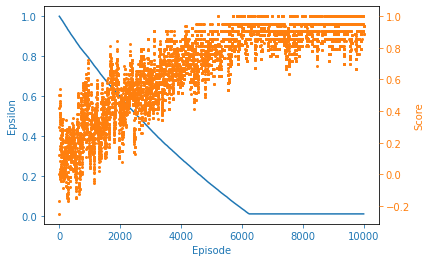

In [28]:
# Hyperparams

# discount factor for future rewards
GAMMA = 0.1 #0.99
BATCH_SIZE = 100
BUFFER_SIZE = 500
MIN_REPLAY_SIZE = 100
# Epsilon determining Exploration Exploitation Trade Off
EPSILON_START = 1.0
EPSILON_DEC = 1e-4
EPSILON_END = 0.01

TARGET_UPDATE_FREQ = 100
LEARNING_RATE = 1e-4
N_EPISODES = 10000
LOG_FREQ = 100
DIMS = 20
PI = 3

if __name__ == '__main__':
    #reset_working_directory()
    #os.chdir("..")
    seed_random()
    start = time()

    # read in all preprocessed data for a simulated, supervised environment to sample from
    train_data, test_data, scaler = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)
    # train_data, test_data = DataProvider.get_reduced_dimensions_with_pca(DIMS, pi=PI, normal_only=True)
    env = SensorEnvironment(train_data)

    # The input size is the number of features 
    print("state size: ", env.observation_space_size)
    agent = Agent(input_dims=env.observation_space_size, n_actions=len(env.actions), buffer_size=BUFFER_SIZE,
                  batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END)

    # initialize memory replay buffer (randomly)
    SimulationEngine.init_replay_memory(agent=agent, env=env, min_size=MIN_REPLAY_SIZE)

    # main training
    episode_returns, eps_history = SimulationEngine.learn_agent_offline(agent=agent, env=env, num_episodes=N_EPISODES,
                                                                        t_update_freq=TARGET_UPDATE_FREQ)

    end = time()
    print("Total training time: ", end - start)

    num = 0
    agent.save_agent_state(0, "offline_prototype_1_raw_behaviors")

    x = [i + 1 for i in range(N_EPISODES)]
    filename = 'offline_prototype_1_raw_behaviors/mtd_agent_p1.pdf'
    plot_learning(x, episode_returns, eps_history, filename)

    # check predictions with dqn from trained and stored agent
    pretrained_agent = get_pretrained_agent(path=f"offline_prototype_1_raw_behaviors/trained_models/agent_{num}.pth",
                                            input_dims=env.observation_space_size, n_actions=len(env.actions),
                                            buffer_size=BUFFER_SIZE)
    # check predictions with learnt dqn
    evaluate_agent(pretrained_agent, test_data=test_data)

    # check scaling if uncommented
    # print("evaluate p1 agent on 'real' decision and afterstate data:")
    # dtrain, dtest, atrain, atest = DataProvider.get_reduced_dimensions_with_pca_ds_as(DIMS,
    #                                                                                   dir="offline_prototype_1_raw_behaviors/")
    # evaluate_agent(agent=pretrained_agent, test_data=dtest)
    # evaluate_agent_on_afterstates(agent=pretrained_agent, test_data=atest)







